# Introduction to Clustering

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
custs_df = pd.read_excel("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/distance/Distance_Datasets.xlsx",
                         'Customers')

In [22]:
custs_df

,Name,Age,Income
0,A,20,10000
1,B,21,11000
2,C,70,10500
3,D,50,90000


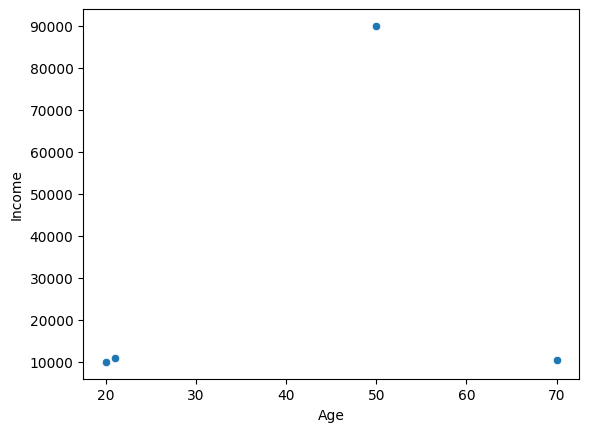

In [23]:
sn.scatterplot(data = custs_df,
               x = 'Age',
               y = 'Income');

## Euclidean Distance

The  distance between two customers, $customer_{1}$ and $customer_{2}$ is calcualte as follows:

$\sqrt{(age_{1} - age_{2})^2 +  (income_{1} - income_{2})^2}$

In [24]:
from sklearn.metrics.pairwise import euclidean_distances

In [25]:
euclidean_distances(custs_df[['Age', 'Income']])

array([[    0.        ,  1000.0005    ,   502.49378106, 80000.005625  ],
       [ 1000.0005    ,     0.        ,   502.39526272, 79000.00532278],
       [  502.49378106,   502.39526272,     0.        , 79500.00251572],
       [80000.005625  , 79000.00532278, 79500.00251572,     0.        ]])

#### Inference:

- Distance wise A and B are very different, whereas A and c are similar.
In reality, A and B are are very similar whereas A and C are very different as they have huge difference in terms of age.

- This is because of difference in scale in which age and income are represented.

##  Min Max Scaling


In this technique, the minimum value of the feature is scaled to 0 and the maximum value is scaled to 1. All other values are scaled to a value between 0 and 1 based on their relative position to the minimum and maximum values.

$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$

[Sklearn Source](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
scaled_custs_df = scaler.fit_transform(
    custs_df[["Age", "Income"]] )

scaled_custs_df[0:10]

array([[0.     , 0.     ],
       [0.02   , 0.0125 ],
       [1.     , 0.00625],
       [0.6    , 1.     ]])

In [28]:
dist = euclidean_distances(scaled_custs_df)

In [29]:
pd.DataFrame(dist, index = custs_df.index, columns = custs_df.index )

,0,1,2,3
0,0.000000,0.023585,1.000020,1.166190
1,0.023585,0.000000,0.980020,1.145232
2,1.000020,0.980020,0.000000,1.071232
3,1.166190,1.145232,1.071232,0.000000


## Cosine Distances

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
cosine_similarity(custs_df[['Age', 'Income']])

array([[1.        , 1.        , 0.99998911, 0.99999896],
       [1.        , 1.        , 0.99998868, 0.99999908],
       [0.99998911, 0.99998868, 1.        , 0.99998133],
       [0.99999896, 0.99999908, 0.99998133, 1.        ]])

In [32]:
cosine_similarity(custs_df[['Age', 'Income']])

array([[1.        , 1.        , 0.99998911, 0.99999896],
       [1.        , 1.        , 0.99998868, 0.99999908],
       [0.99998911, 0.99998868, 1.        , 0.99998133],
       [0.99999896, 0.99999908, 0.99998133, 1.        ]])

## Canberra Distances

In [33]:
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('canberra')

In [34]:
dist.pairwise(custs_df[['Age', 'Income']])

array([[0.        , 0.07200929, 0.5799458 , 1.22857143],
       [0.07200929, 0.        , 0.56171735, 1.19062892],
       [0.5799458 , 0.56171735, 0.        , 0.95771144],
       [1.22857143, 1.19062892, 0.95771144, 0.        ]])

## Jaccard Distance for categorical features

In [35]:
movies_df = pd.read_excel("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/distance/Distance_Datasets.xlsx",
                          "Movies",
                          index_col='Users')

In [36]:
movies_df

,Movie_1,Movie_2,Movie_3,Movie_4,Movie_5,Movie_6,Movie_7,Movie_8,Movie_9,Movie_10
Users,,,,,,,,,,
User_1,0,1,1,0,1,1,1,1,1,1
User_2,1,0,0,1,0,0,0,0,0,1
User_3,0,1,1,0,0,1,1,1,1,0
User_4,1,0,1,0,1,1,0,1,1,0
User_5,0,1,0,1,1,1,1,1,0,1


In [37]:
from scipy.spatial.distance import jaccard

In [38]:
jaccard(movies_df.loc['User_1'].values, movies_df.loc['User_2'].values)

0.9

In [39]:
from sklearn.metrics.pairwise import pairwise_distances

In [40]:
jaccard_similarity = 1 - pairwise_distances(movies_df.values, metric="jaccard")

In [41]:
jaccard_similarity

array([[1.        , 0.1       , 0.75      , 0.55555556, 0.66666667],
       [0.1       , 1.        , 0.        , 0.125     , 0.25      ],
       [0.75      , 0.        , 1.        , 0.5       , 0.44444444],
       [0.55555556, 0.125     , 0.5       , 1.        , 0.3       ],
       [0.66666667, 0.25      , 0.44444444, 0.3       , 1.        ]])

In [42]:
pd.DataFrame(jaccard_similarity, index = movies_df.index, columns = movies_df.index )

Users,User_1,User_2,User_3,User_4,User_5
Users,,,,,
User_1,1.000000,0.100,0.750000,0.555556,0.666667
User_2,0.100000,1.000,0.000000,0.125000,0.250000
User_3,0.750000,0.000,1.000000,0.500000,0.444444
User_4,0.555556,0.125,0.500000,1.000000,0.300000
User_5,0.666667,0.250,0.444444,0.300000,1.000000


## Haversine

In [43]:
cities_df = pd.read_excel("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/distance/Distance_Datasets.xlsx"
                          , "Cities"
                          , index_col='City')

In [44]:
cities_df

,Latitude,Longitude
City,,
Mumbai,19.0760,72.8777
Delhi,28.7041,77.1025
Bangalore,12.9716,77.5946
Kolkata,22.5726,88.3639
Chennai,13.0827,80.2707
Hyderabad,17.3850,78.4867
Pune,18.5204,73.8567
Ahmedabad,23.0225,72.5714
Jaipur,26.9124,75.7873


In [45]:
from math import radians

In [46]:
cities_df['lat_radians'] = cities_df['Latitude'].map(radians)
cities_df['long_radians'] = cities_df['Longitude'].map(radians)

In [47]:
cities_df

,Latitude,Longitude,lat_radians,long_radians
City,,,,
Mumbai,19.0760,72.8777,0.332939,1.271956
Delhi,28.7041,77.1025,0.500981,1.345692
Bangalore,12.9716,77.5946,0.226397,1.354281
Kolkata,22.5726,88.3639,0.393966,1.542241
Chennai,13.0827,80.2707,0.228336,1.400988
Hyderabad,17.3850,78.4867,0.303425,1.369851
Pune,18.5204,73.8567,0.323242,1.289043
Ahmedabad,23.0225,72.5714,0.401818,1.266610
Jaipur,26.9124,75.7873,0.469710,1.322738


In [48]:
from sklearn.metrics.pairwise import haversine_distances

In [49]:
aerial_distance = haversine_distances(cities_df[['lat_radians', 'long_radians']])

In [50]:
aerial_distance

array([[0.        , 0.18101417, 0.13268221, 0.25974558, 0.16215641,
        0.09754557, 0.01885925, 0.06905977, 0.14452085, 0.18751762],
       [0.18101417, 0.        , 0.27470017, 0.20683623, 0.27745274,
        0.1987962 , 0.18513301, 0.12202296, 0.03728339, 0.06762515],
       [0.13268221, 0.27470017, 0.        , 0.24496886, 0.04554576,
        0.07847955, 0.11540213, 0.19416806, 0.24510062, 0.24829166],
       [0.25974558, 0.20683623, 0.24496886, 0.        , 0.21320997,
        0.18550967, 0.24727296, 0.25409757, 0.21311791, 0.13922217],
       [0.16215641, 0.27745274, 0.04554576, 0.21320997, 0.        ,
        0.08087296, 0.14351981, 0.21532082, 0.25225227, 0.24048084],
       [0.09754557, 0.1987962 , 0.07847955, 0.18550967, 0.08087296,
        0.        , 0.07938379, 0.13804712, 0.17189556, 0.16984281],
       [0.01885925, 0.18513301, 0.11540213, 0.24727296, 0.14351981,
        0.07938379, 0.        , 0.08132571, 0.14972072, 0.18470044],
       [0.06905977, 0.12202296, 0.1941680

In [51]:
aerial_distance_kms = aerial_distance * 6371000/1000
aerial_distance_kms

array([[   0.        , 1153.24129125,  845.31838566, 1654.8391168 ,
        1033.09851229,  621.46285008,  120.15230197,  439.97982267,
         920.74235994, 1194.6747399 ],
       [1153.24129125,    0.        , 1750.11476241, 1317.75360304,
        1767.65141115, 1266.53060328, 1179.48242792,  777.40828075,
         237.53250239,  430.83985395],
       [ 845.31838566, 1750.11476241,    0.        , 1560.69662326,
         290.17202495,  499.9932409 ,  735.22694258, 1237.04469746,
        1561.53604825, 1581.86618933],
       [1654.8391168 , 1317.75360304, 1560.69662326,    0.        ,
        1358.36071543, 1181.88210021, 1575.37605359, 1618.85559067,
        1357.77419014,  886.98443856],
       [1033.09851229, 1767.65141115,  290.17202495, 1358.36071543,
           0.        ,  515.24163438,  914.3646912 , 1371.80891612,
        1607.09919695, 1532.10343439],
       [ 621.46285008, 1266.53060328,  499.9932409 , 1181.88210021,
         515.24163438,    0.        ,  505.75412148,  879

In [52]:
pd.DataFrame( aerial_distance_kms, index = cities_df.index, columns = cities_df.index )

City,Mumbai,Delhi,Bangalore,Kolkata,Chennai,Hyderabad,Pune,Ahmedabad,Jaipur,Lucknow
City,,,,,,,,,,
Mumbai,0.000000,1153.241291,845.318386,1654.839117,1033.098512,621.462850,120.152302,439.979823,920.742360,1194.674740
Delhi,1153.241291,0.000000,1750.114762,1317.753603,1767.651411,1266.530603,1179.482428,777.408281,237.532502,430.839854
Bangalore,845.318386,1750.114762,0.000000,1560.696623,290.172025,499.993241,735.226943,1237.044697,1561.536048,1581.866189
Kolkata,1654.839117,1317.753603,1560.696623,0.000000,1358.360715,1181.882100,1575.376054,1618.855591,1357.774190,886.984439
Chennai,1033.098512,1767.651411,290.172025,1358.360715,0.000000,515.241634,914.364691,1371.808916,1607.099197,1532.103434
Hyderabad,621.462850,1266.530603,499.993241,1181.882100,515.241634,0.000000,505.754121,879.498203,1095.146607,1082.068565
Pune,120.152302,1179.482428,735.226943,1575.376054,914.364691,505.754121,0.000000,518.126083,953.870676,1176.726510
Ahmedabad,439.979823,777.408281,1237.044697,1618.855591,1371.808916,879.498203,518.126083,0.000000,540.467958,945.107839
Jaipur,920.742360,237.532502,1561.536048,1357.774190,1607.099197,1095.146607,953.870676,540.467958,0.000000,511.683216
